In [147]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from matplotlib import pyplot
import random

import warnings
warnings.filterwarnings("ignore")

In [148]:
xlsx = pd.ExcelFile('Telco_customer_churn.xlsx')
df_tlco_churn = pd.read_excel(xlsx, 'Telco_Churn')

In [149]:
df_tlco_churn = df_tlco_churn.rename(columns={'CustomerID': 'Customer ID'})

In [150]:
df_tlco_churn.columns

Index(['Customer ID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [151]:
xlsx = pd.ExcelFile('Telco_customer_churn_demographics.xlsx')
df_demograph = pd.read_excel(xlsx, 'Telco_Churn')

In [152]:
df_demograph.dtypes

Customer ID             object
Count                    int64
Gender                  object
Age                      int64
Under 30                object
Senior Citizen          object
Married                 object
Dependents              object
Number of Dependents     int64
dtype: object

In [153]:
xlsx = pd.ExcelFile('Telco_customer_churn_population.xlsx')
df_population = pd.read_excel(xlsx, 'Population')

In [154]:
df_population.head()

,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019


In [155]:
xlsx = pd.ExcelFile('Telco_customer_churn_services.xlsx')
df_services = pd.read_excel(xlsx, 'Telco_Churn')

In [156]:
xlsx = pd.ExcelFile('Telco_customer_churn_status.xlsx')
df_status = pd.read_excel(xlsx, 'Telco_Churn')

# Joining Datasets

In [157]:
merge_1 = pd.merge(df_tlco_churn, df_demograph, on='Customer ID')

In [158]:
merge_2 = pd.merge(merge_1, df_services, on='Customer ID')

In [159]:
merge_3 = pd.merge(merge_2, df_status, on='Customer ID')

In [160]:
df_telco = merge_3

In [161]:
df_telco.head()

,Customer ID,Count_x,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender_x,...,Count_y,Quarter_y,Satisfaction Score,Customer Status,Churn Label_y,Churn Value_y,Churn Score_y,CLTV_y,Churn Category,Churn Reason_y
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,1,Q3,1,Churned,Yes,1,86,3239,Competitor,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,1,Q3,2,Churned,Yes,1,67,2701,Other,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,1,Q3,3,Churned,Yes,1,86,5372,Other,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,1,Q3,3,Churned,Yes,1,84,5003,Other,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,1,Q3,1,Churned,Yes,1,89,5340,Competitor,Competitor had better devices


In [162]:
columns_to_be_dropped = ['Count_x', 'Count_y', 'Gender_y','Senior Citizen_y', 'Dependents_y','Count_x','Phone Service_y',
       'Multiple Lines_y','Internet Service_y','Online Security_y', 'Online Backup_y', 'Streaming TV_y', 'Streaming Movies_y',
       'Contract_y','Paperless Billing_y', 'Payment Method_y','Total Charges_y','Count_y', 'Quarter_y','Churn Label_y',
       'Churn Value_y', 'Churn Score_y', 'CLTV_y','Churn Reason_y', 'Tenure in Months', 'Monthly Charge', 'Quarter_x',
        'Total Long Distance Charges', 'Total Charges_x', 'Churn Label_x','Customer Status', 'Churn Category', 'Churn Reason_x' ]

In [163]:
df_telco = df_telco.drop(labels = columns_to_be_dropped, axis=1)

In [164]:
df_telco.columns

Index(['Customer ID', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Gender_x', 'Senior Citizen_x', 'Partner',
       'Dependents_x', 'Tenure Months', 'Phone Service_x', 'Multiple Lines_x',
       'Internet Service_x', 'Online Security_x', 'Online Backup_x',
       'Device Protection', 'Tech Support', 'Streaming TV_x',
       'Streaming Movies_x', 'Contract_x', 'Paperless Billing_x',
       'Payment Method_x', 'Monthly Charges', 'Churn Value_x', 'Churn Score_x',
       'CLTV_x', 'Age', 'Under 30', 'Married', 'Number of Dependents',
       'Referred a Friend', 'Number of Referrals', 'Offer',
       'Avg Monthly Long Distance Charges', 'Internet Type',
       'Avg Monthly GB Download', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming Music', 'Unlimited Data',
       'Total Refunds', 'Total Extra Data Charges', 'Total Revenue',
       'Satisfaction Score'],
      dtype='object')

In [165]:
df_telco = df_telco.rename(columns={'Gender_x':'Gender', 'Senior Citizen_x':'Senior Citizen',
        'Phone Service_x':'Phone Service', 'Multiple Lines_x':'Multiple Lines',
        'Dependents_x':'Dependents',
       'Internet Service_x':'Internet Service', 'Online Security_x':'Online Security', 'Online Backup_x':'Online Backup',
       'Streaming TV_x':'Streaming TV',
       'Streaming Movies_x':'Streaming Movies', 'Contract_x':'Contract', 'Paperless Billing_x':'Paperless Billing',
       'Payment Method_x':'Payment Method','Churn Value_x':'Churn Value', 'Churn Score_x':'Churn Score',
       'CLTV_x':'CLTV'})

In [166]:
df_selected = df_telco[['State', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
        'Phone Service', 'Multiple Lines',
        'Age', 'Under 30', 'Married', 'Number of Dependents', 'Dependents',
        'Referred a Friend', 'Number of Referrals', 'Offer',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method','Churn Value', 'Churn Score',
       'Avg Monthly Long Distance Charges', 'Internet Type',
       'Avg Monthly GB Download', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming Music', 'Unlimited Data','Monthly Charges',
       'Total Refunds', 'Total Extra Data Charges', 'Total Revenue','Tenure Months', 'CLTV',
       'Satisfaction Score']]

In [167]:
df_selected.dtypes

State                                 object
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Gender                                object
Senior Citizen                        object
Partner                               object
Phone Service                         object
Multiple Lines                        object
Age                                    int64
Under 30                              object
Married                               object
Number of Dependents                   int64
Dependents                            object
Referred a Friend                     object
Number of Referrals                    int64
Offer                                 object
Internet Service                      object
Online Security                       object
Online Backup                         object
Device Protection                     object
Tech Suppo

In [168]:
df_selected['Zip Code'] = df_selected['Zip Code'].astype('object')

In [169]:
df_selected.dtypes

State                                 object
City                                  object
Zip Code                              object
Latitude                             float64
Longitude                            float64
Gender                                object
Senior Citizen                        object
Partner                               object
Phone Service                         object
Multiple Lines                        object
Age                                    int64
Under 30                              object
Married                               object
Number of Dependents                   int64
Dependents                            object
Referred a Friend                     object
Number of Referrals                    int64
Offer                                 object
Internet Service                      object
Online Security                       object
Online Backup                         object
Device Protection                     object
Tech Suppo

***************************************************************************************
Gender


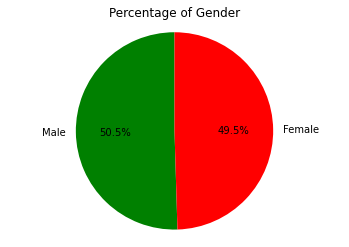

Number of values:
Male      3555
Female    3488
Name: Gender, dtype: int64
***************************************************************************************
Senior Citizen


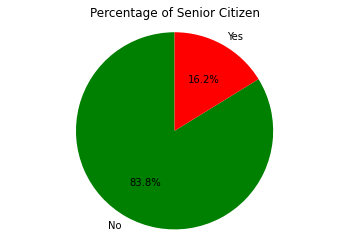

Number of values:
No     5901
Yes    1142
Name: Senior Citizen, dtype: int64
***************************************************************************************
Partner


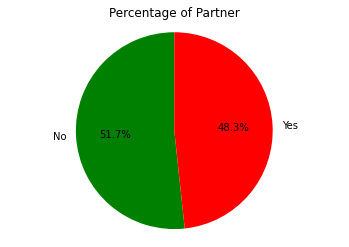

Number of values:
No     3641
Yes    3402
Name: Partner, dtype: int64
***************************************************************************************
Phone Service


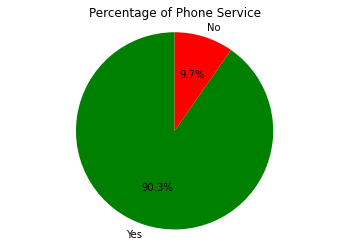

Number of values:
Yes    6361
No      682
Name: Phone Service, dtype: int64
***************************************************************************************
Multiple Lines


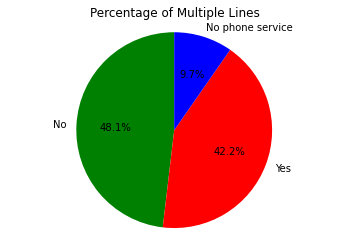

Number of values:
No                  3390
Yes                 2971
No phone service     682
Name: Multiple Lines, dtype: int64
***************************************************************************************
Under 30


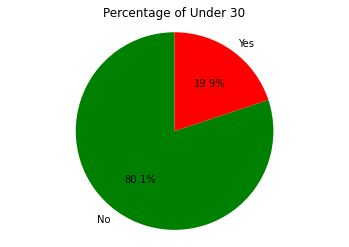

Number of values:
No     5642
Yes    1401
Name: Under 30, dtype: int64
***************************************************************************************
Married


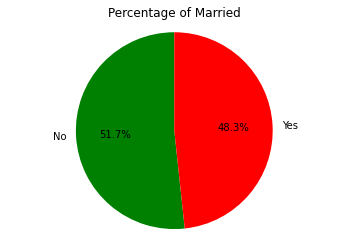

Number of values:
No     3641
Yes    3402
Name: Married, dtype: int64
***************************************************************************************
Dependents


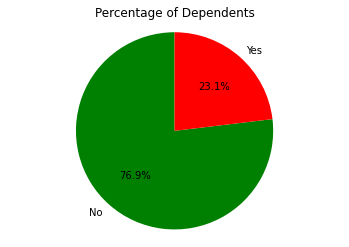

Number of values:
No     5416
Yes    1627
Name: Dependents, dtype: int64
***************************************************************************************
Referred a Friend


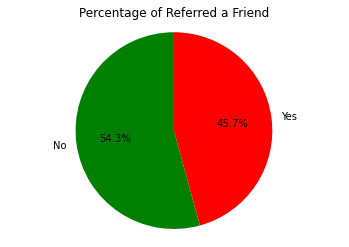

Number of values:
No     3821
Yes    3222
Name: Referred a Friend, dtype: int64
***************************************************************************************
Offer


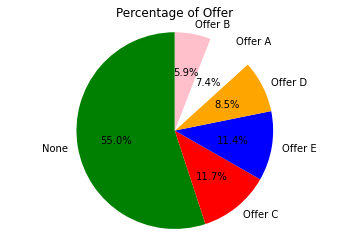

Number of values:
None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64
***************************************************************************************
Internet Service


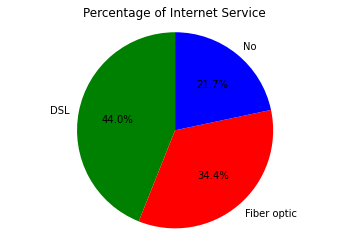

Number of values:
Fiber optic    3096
DSL            2421
No             1526
Name: Internet Service, dtype: int64
***************************************************************************************
Online Security


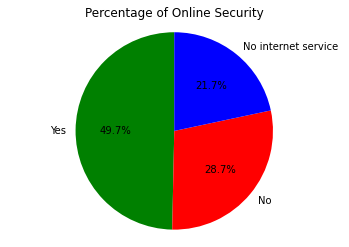

Number of values:
No                     3498
Yes                    2019
No internet service    1526
Name: Online Security, dtype: int64
***************************************************************************************
Online Backup


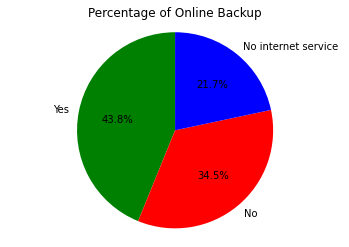

Number of values:
No                     3088
Yes                    2429
No internet service    1526
Name: Online Backup, dtype: int64
***************************************************************************************
Device Protection


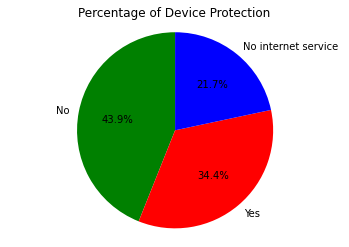

Number of values:
No                     3095
Yes                    2422
No internet service    1526
Name: Device Protection, dtype: int64
***************************************************************************************
Tech Support


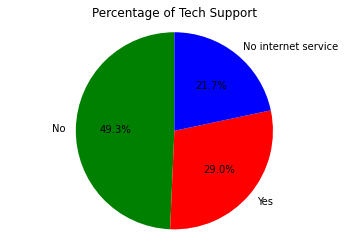

Number of values:
No                     3473
Yes                    2044
No internet service    1526
Name: Tech Support, dtype: int64
***************************************************************************************
Streaming TV


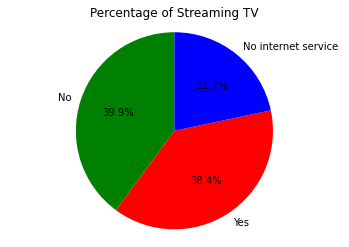

Number of values:
No                     2810
Yes                    2707
No internet service    1526
Name: Streaming TV, dtype: int64
***************************************************************************************
Streaming Movies


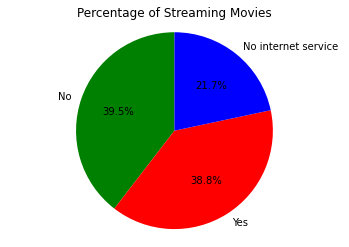

Number of values:
No                     2785
Yes                    2732
No internet service    1526
Name: Streaming Movies, dtype: int64
***************************************************************************************
Contract


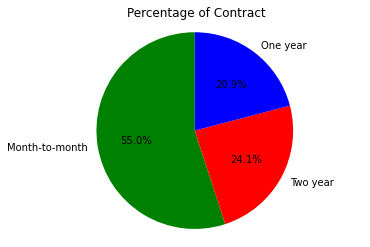

Number of values:
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
***************************************************************************************
Paperless Billing


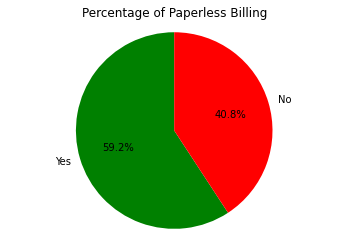

Number of values:
Yes    4171
No     2872
Name: Paperless Billing, dtype: int64
***************************************************************************************
Payment Method


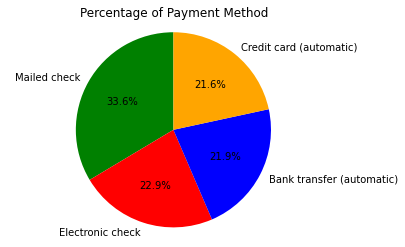

Number of values:
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Payment Method, dtype: int64
***************************************************************************************
Internet Type


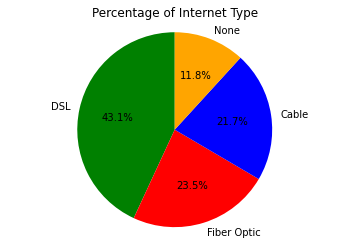

Number of values:
Fiber Optic    3035
DSL            1652
None           1526
Cable           830
Name: Internet Type, dtype: int64
***************************************************************************************
Device Protection Plan


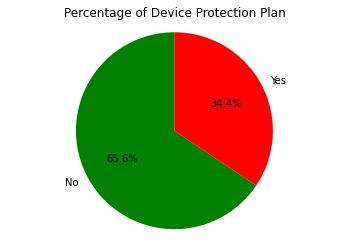

Number of values:
No     4621
Yes    2422
Name: Device Protection Plan, dtype: int64
***************************************************************************************
Premium Tech Support


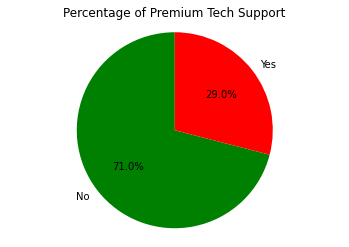

Number of values:
No     4999
Yes    2044
Name: Premium Tech Support, dtype: int64
***************************************************************************************
Streaming Music


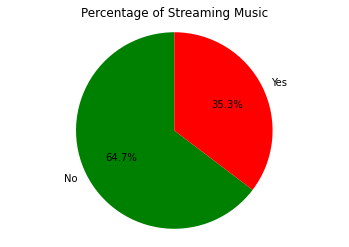

Number of values:
No     4555
Yes    2488
Name: Streaming Music, dtype: int64
***************************************************************************************
Unlimited Data


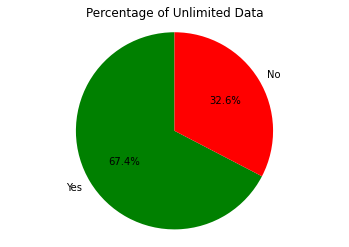

Number of values:
Yes    4745
No     2298
Name: Unlimited Data, dtype: int64


In [170]:
df_object = df_selected.select_dtypes(include='object')
df_object = df_object.drop(labels=['State', 'City', 'Zip Code'], axis=1)

for i in df_object.columns:
    print('***************************************************************************************')
    print(i)
    etiquetas = df_object[i].unique()
    sectores = list(df_object[i].value_counts())
    plt.pie(sectores, labels=etiquetas, colors=['green', "red", 'blue', 'orange', 'white', 'pink', 'yellow'],autopct='%1.1f%%',startangle=90)
    plt.axis('equal')
    plt.title('Percentage of %s' %i)
    plt.show()
    x = df_object[i].value_counts()
    print('Number of values:')
    print(x)

## Nalisha Questions for the Presentation

In [171]:
df_telco.columns

Index(['Customer ID', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Churn Value', 'Churn Score', 'CLTV', 'Age', 'Under 30', 'Married',
       'Number of Dependents', 'Referred a Friend', 'Number of Referrals',
       'Offer', 'Avg Monthly Long Distance Charges', 'Internet Type',
       'Avg Monthly GB Download', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming Music', 'Unlimited Data',
       'Total Refunds', 'Total Extra Data Charges', 'Total Revenue',
       'Satisfaction Score'],
      dtype='object')

### The best costumers for Churn Score

In [172]:
df_telco["Churn Score"].min()

5

In [173]:
df_telco[df_telco["Churn Score"]==5]

,Customer ID,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Internet Type,Avg Monthly GB Download,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Revenue,Satisfaction Score
2148,7156-MXBJE,United States,California,San Diego,92127,"33.017518, -117.118456",33.017518,-117.118456,Female,No,...,DSL,53,Yes,Yes,Yes,No,0.0,30,3799.32,3


### The best costumers for Total Revenue

In [174]:
df_telco["Total Revenue"].max()

11979.34

In [175]:
df_telco[df_telco["Total Revenue"]==11979.34]

,Customer ID,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Internet Type,Avg Monthly GB Download,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Revenue,Satisfaction Score
3799,0164-APGRB,United States,California,Calistoga,94515,"38.629618, -122.593216",38.629618,-122.593216,Female,No,...,Fiber Optic,5,Yes,Yes,Yes,Yes,0.0,0,11979.34,4


### The best costumers for CLTV

In [176]:
df_telco["CLTV"].max()

6500

In [177]:
df_telco[df_telco["CLTV"]==6500]

,Customer ID,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Internet Type,Avg Monthly GB Download,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Revenue,Satisfaction Score
3482,7622-FWGEW,United States,California,Costa Mesa,92626,"33.678591, -117.905471",33.678591,-117.905471,Male,Yes,...,DSL,30,Yes,Yes,No,Yes,0.0,0,6598.53,3


In [178]:
df_telco.columns

Index(['Customer ID', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Churn Value', 'Churn Score', 'CLTV', 'Age', 'Under 30', 'Married',
       'Number of Dependents', 'Referred a Friend', 'Number of Referrals',
       'Offer', 'Avg Monthly Long Distance Charges', 'Internet Type',
       'Avg Monthly GB Download', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming Music', 'Unlimited Data',
       'Total Refunds', 'Total Extra Data Charges', 'Total Revenue',
       'Satisfaction Score'],
      dtype='object')

### Total extra data charges per internet service per contract type

In [179]:
df_telco.groupby(['Contract','Internet Service'])['Total Extra Data Charges'].sum()

Contract        Internet Service
Month-to-month  DSL                  8580
                Fiber optic         16990
                No                      0
One year        DSL                  6010
                Fiber optic          5910
                No                      0
Two year        DSL                  6900
                Fiber optic          3930
                No                      0
Name: Total Extra Data Charges, dtype: int64

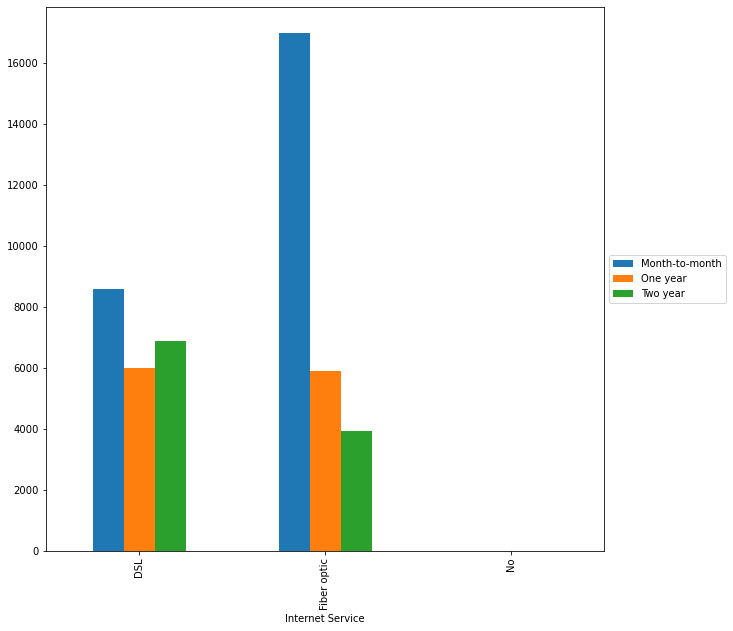

In [180]:
df_telco.groupby(['Internet Service', 'Contract'])['Total Extra Data Charges'].sum().unstack().plot(kind="bar", figsize=(10,10)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Total revenue per age per contract type

In [181]:
df_telco.groupby(['Age','Contract'])['Total Revenue'].sum()

Age  Contract      
19   Month-to-month     85831.92
     One year          142155.27
     Two year          124707.04
20   Month-to-month    119050.68
     One year          144458.12
                         ...    
79   One year           64860.25
     Two year           50276.63
80   Month-to-month    105856.97
     One year           71628.24
     Two year           54410.61
Name: Total Revenue, Length: 186, dtype: float64

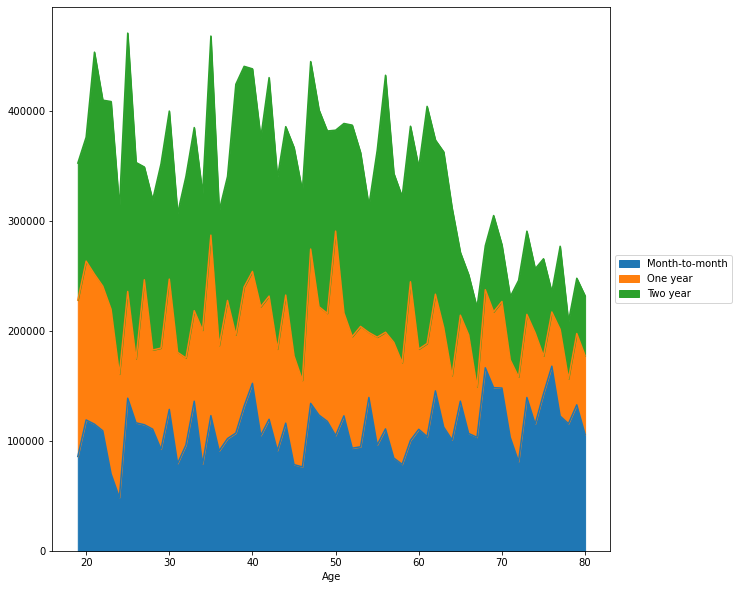

In [182]:
df_telco.groupby(['Age','Contract'])['Total Revenue'].sum().unstack().plot(kind="area", figsize=(10,10)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Satisfaction Score per contract type

In [183]:
df_telco.groupby(['Contract'])['Satisfaction Score'].mean()

Contract
Month-to-month    2.936516
One year          3.563476
Two year          3.673156
Name: Satisfaction Score, dtype: float64

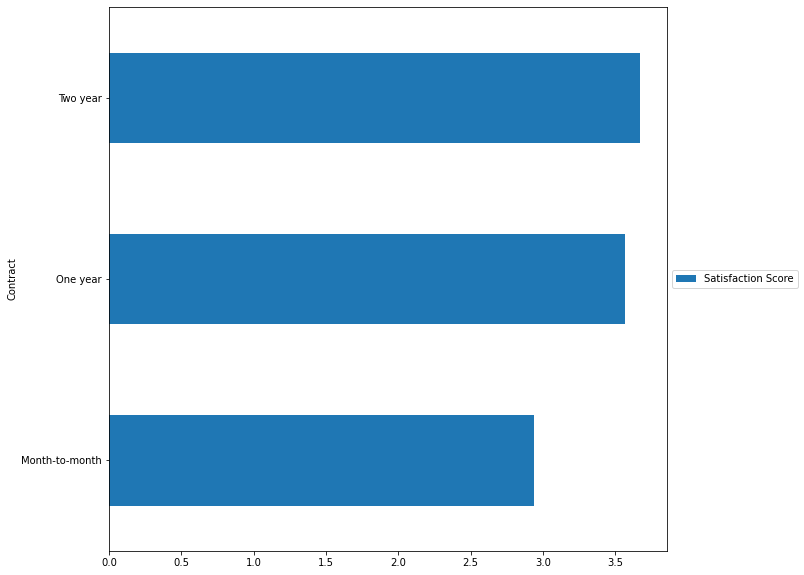

In [184]:
df_telco.groupby(['Contract'])['Satisfaction Score'].mean().plot(kind="barh", figsize=(10,10)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Model Preparation

In [185]:
df_selected.dtypes

State                                 object
City                                  object
Zip Code                              object
Latitude                             float64
Longitude                            float64
Gender                                object
Senior Citizen                        object
Partner                               object
Phone Service                         object
Multiple Lines                        object
Age                                    int64
Under 30                              object
Married                               object
Number of Dependents                   int64
Dependents                            object
Referred a Friend                     object
Number of Referrals                    int64
Offer                                 object
Internet Service                      object
Online Security                       object
Online Backup                         object
Device Protection                     object
Tech Suppo

In [186]:
df_selected.to_csv('telco_cltv.csv',sep=';',header=True, index=True, decimal=',')

In [187]:
df_selected = df_selected.drop(labels=['Zip Code','Latitude','Longitude'], axis=1)

In [188]:
numerical_features = df_selected.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_selected.select_dtypes(include=['object']).columns

In [189]:
numerical_features

Index(['Age', 'Number of Dependents', 'Number of Referrals', 'Churn Value',
       'Churn Score', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Revenue', 'Tenure Months', 'CLTV',
       'Satisfaction Score'],
      dtype='object')

In [190]:
df_model=pd.concat([df_selected[numerical_features], df_selected[categorical_features]], axis=1)

In [191]:
# from sklearn.preprocessing import StandardScaler

# features = df_model[numerical_features]
# scaler = RobustScaler().fit(features.values)

# features = scaler.transform(features.values)

# df_model[numerical_features] = features
# df_model.head()

In [192]:
for i in df_model.columns:
    print('*********************************')
    print(i)
    x = df_model[i].value_counts()
    print(x)

*********************************
Age
42    156
47    153
40    150
44    148
23    146
     ... 
80     66
78     63
66     63
67     61
72     58
Name: Age, Length: 62, dtype: int64
*********************************
Number of Dependents
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
8       1
9       1
Name: Number of Dependents, dtype: int64
*********************************
Number of Referrals
0     3821
1     1086
5      264
3      255
7      248
9      238
4      236
2      236
10     223
6      221
8      213
11       2
Name: Number of Referrals, dtype: int64
*********************************
Churn Value
0    5174
1    1869
Name: Churn Value, dtype: int64
*********************************
Churn Score
80    151
71    148
77    145
67    143
76    141
     ... 
88     33
9       3
7       2
8       2
5       1
Name: Churn Score, Length: 85, dtype: int64
*********************************
Avg Monthly Long Distance Charges
0.00     682
18.26      7
42

# PCA

In [193]:
df_cat = df_model[categorical_features]
df_cat.head(3)

,State,City,Gender,Senior Citizen,Partner,Phone Service,Multiple Lines,Under 30,Married,Dependents,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Internet Type,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data
0,California,Los Angeles,Male,No,No,Yes,No,No,No,No,...,No,No,Month-to-month,Yes,Mailed check,DSL,No,No,No,Yes
1,California,Los Angeles,Female,No,No,Yes,No,Yes,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,Fiber Optic,No,No,No,Yes
2,California,Los Angeles,Female,No,No,Yes,Yes,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,Cable,Yes,No,Yes,Yes


In [194]:
df_cat.columns

Index(['State', 'City', 'Gender', 'Senior Citizen', 'Partner', 'Phone Service',
       'Multiple Lines', 'Under 30', 'Married', 'Dependents',
       'Referred a Friend', 'Offer', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Internet Type', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming Music', 'Unlimited Data'],
      dtype='object')

In [195]:
df_cat = df_cat.drop(labels=['State','City', 'Payment Method', 'Paperless Billing', 'Internet Service', 'Offer'], axis=1)

In [196]:
df_cat = pd.get_dummies(df_cat, columns = df_cat.columns, drop_first=True)
df_cat.head()

,Gender_Male,Senior Citizen_Yes,Partner_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Under 30_Yes,Married_Yes,Dependents_Yes,Referred a Friend_Yes,...,Streaming Movies_Yes,Contract_One year,Contract_Two year,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Device Protection Plan_Yes,Premium Tech Support_Yes,Streaming Music_Yes,Unlimited Data_Yes
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,1,1
3,0,0,1,1,0,1,1,1,1,0,...,1,0,0,0,1,0,1,1,1,1
4,1,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,1


In [197]:
#from sklearn.decomposition import PCA

#pca_cat = PCA (n_components=20)
#p_comp_transformed_cat = pca_cat.fit_transform(df_cat)
#print(p_comp_transformed_cat)

In [198]:
#variance_ratio = pca_cat.explained_variance_ratio_

#print(variance_ratio)

In [199]:
#pca_cat.explained_variance_ratio_.cumsum()

In [200]:
#pca_columns = []

#for i in range(len(variance_ratio)):
    #x = 'pca_'+ str(i+1)
    #pca_columns.append(x)

In [202]:
#principalDf_cat = pd.DataFrame(data = p_comp_transformed_cat, columns = pca_columns)

In [203]:
#df_model = pd.concat([df_model[numerical_features], principalDf_cat], axis = 1)

In [204]:
df_model = pd.concat([df_model[numerical_features], df_cat], axis = 1)

In [205]:
df_model.head()

,Age,Number of Dependents,Number of Referrals,Churn Value,Churn Score,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charges,Total Refunds,Total Extra Data Charges,...,Streaming Movies_Yes,Contract_One year,Contract_Two year,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Device Protection Plan_Yes,Premium Tech Support_Yes,Streaming Music_Yes,Unlimited Data_Yes
0,37,0,0,1,86,10.47,21,53.85,0.0,0,...,0,0,0,1,0,0,0,0,0,1
1,19,2,0,1,67,9.12,51,70.70,0.0,0,...,0,0,0,0,1,0,0,0,0,1
2,31,2,0,1,86,12.15,26,99.65,0.0,0,...,1,0,0,0,0,0,1,0,1,1
3,23,3,0,1,84,4.89,47,104.80,0.0,0,...,1,0,0,0,1,0,1,1,1,1
4,38,1,0,1,89,44.33,11,103.70,0.0,0,...,1,0,0,0,1,0,1,0,1,1


In [206]:
df_model.columns

Index(['Age', 'Number of Dependents', 'Number of Referrals', 'Churn Value',
       'Churn Score', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Revenue', 'Tenure Months', 'CLTV',
       'Satisfaction Score', 'Gender_Male', 'Senior Citizen_Yes',
       'Partner_Yes', 'Phone Service_Yes', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Under 30_Yes', 'Married_Yes', 'Dependents_Yes',
       'Referred a Friend_Yes', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No internet service',
       'Streaming Movies_Yes', 'Contract_One year', 'Contract_Two year',
       'Internet T

In [306]:
prueba = df_model

In [307]:
prueba = prueba.drop(labels=['Satisfaction Score', 'Total Revenue', 'Tenure Months', 'Churn Value', 'Number of Referrals',
                            'Total Extra Data Charges', 'Avg Monthly GB Download','Online Security_No internet service',
                             'Online Backup_No internet service','Device Protection_No internet service',
                             'Streaming TV_No internet service', 'Tech Support_No internet service', 
                             'Streaming Movies_No internet service','Dependents_Yes', 'Monthly Charges',  'Churn Score',
                             'Avg Monthly Long Distance Charges','Under 30_Yes', 'Married_Yes','Senior Citizen_Yes'], axis=1)

In [308]:
prueba.columns

Index(['Age', 'Number of Dependents', 'Total Refunds', 'CLTV', 'Gender_Male',
       'Partner_Yes', 'Phone Service_Yes', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Referred a Friend_Yes', 'Online Security_Yes',
       'Online Backup_Yes', 'Device Protection_Yes', 'Tech Support_Yes',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Contract_One year',
       'Contract_Two year', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Device Protection Plan_Yes',
       'Premium Tech Support_Yes', 'Streaming Music_Yes',
       'Unlimited Data_Yes'],
      dtype='object')

In [309]:
#prueba = pd.concat([jan, prueba[['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7',
       #'pca_8', 'pca_9', 'pca_10', 'pca_11', 'pca_12', 'pca_13', 'pca_14',
      # 'pca_15', 'pca_16', 'pca_17', 'pca_18', 'pca_19', 'pca_20']]], axis=1)

<AxesSubplot:>

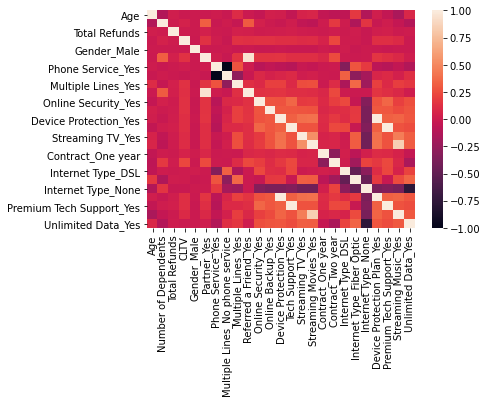

In [310]:
sns.heatmap(prueba.corr())

In [311]:
prueba.corr()

,Age,Number of Dependents,Total Refunds,CLTV,Gender_Male,Partner_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Referred a Friend_Yes,...,Streaming Movies_Yes,Contract_One year,Contract_Two year,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Device Protection Plan_Yes,Premium Tech Support_Yes,Streaming Music_Yes,Unlimited Data_Yes
Age,1.000000,-0.119000,0.024168,-0.001826,0.002186,-0.003666,0.009965,-0.009965,0.103122,-0.004702,...,0.073458,-0.042309,-0.069663,-0.055639,0.170996,-0.117346,0.028491,-0.043760,-0.155400,0.084353
Number of Dependents,-0.119000,1.000000,0.014023,0.049611,0.005840,0.324205,-0.010149,0.010149,-0.030307,0.309319,...,-0.065215,0.015091,0.164068,0.008256,-0.139224,0.153137,-0.019925,0.022094,-0.033048,-0.113853
Total Refunds,0.024168,0.014023,1.000000,0.007992,0.004725,0.040142,0.006331,-0.006331,0.045491,0.038250,...,0.013587,0.005383,0.021195,0.004102,0.022214,-0.020515,0.026038,0.034823,0.003212,0.011101
CLTV,-0.001826,0.049611,0.007992,1.000000,-0.006851,0.137859,0.023015,-0.023015,0.133568,0.125249,...,0.113000,0.056364,0.233151,0.014095,0.012723,-0.011521,0.120394,0.119132,0.096560,-0.001685
Gender_Male,0.002186,0.005840,0.004725,-0.006851,1.000000,-0.001808,-0.006488,0.006488,-0.008414,-0.004176,...,-0.010487,0.008026,-0.003695,0.016180,-0.011433,0.006026,-0.002105,-0.009212,-0.007625,-0.000648
Partner_Yes,-0.003666,0.324205,0.040142,0.137859,-0.001808,1.000000,0.017706,-0.017706,0.142057,0.949987,...,0.117412,0.082783,0.248091,0.000020,-0.002298,0.000615,0.153786,0.119999,0.088700,0.018792
Phone Service_Yes,0.009965,-0.010149,0.006331,0.023015,-0.006488,0.017706,1.000000,-1.000000,0.279690,0.015418,...,-0.032959,-0.002791,0.003519,-0.332029,0.284934,0.172209,-0.071227,-0.096340,-0.039252,-0.122395
Multiple Lines_No phone service,-0.009965,0.010149,-0.006331,-0.023015,0.006488,-0.017706,-1.000000,1.000000,-0.279690,-0.015418,...,0.032959,0.002791,-0.003519,0.332029,-0.284934,-0.172209,0.071227,0.096340,0.039252,0.122395
Multiple Lines_Yes,0.103122,-0.030307,0.045491,0.133568,-0.008414,0.142057,0.279690,-0.279690,1.000000,0.132641,...,0.258751,-0.003794,0.106253,-0.141726,0.359797,-0.210564,0.201137,0.100571,0.193362,0.159669
Referred a Friend_Yes,-0.004702,0.309319,0.038250,0.125249,-0.004176,0.949987,0.015418,-0.015418,0.132641,1.000000,...,0.115328,0.079985,0.240395,0.003532,-0.006583,-0.002842,0.154197,0.121772,0.089917,0.019014


In [312]:
prueba.columns

Index(['Age', 'Number of Dependents', 'Total Refunds', 'CLTV', 'Gender_Male',
       'Partner_Yes', 'Phone Service_Yes', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Referred a Friend_Yes', 'Online Security_Yes',
       'Online Backup_Yes', 'Device Protection_Yes', 'Tech Support_Yes',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Contract_One year',
       'Contract_Two year', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Device Protection Plan_Yes',
       'Premium Tech Support_Yes', 'Streaming Music_Yes',
       'Unlimited Data_Yes'],
      dtype='object')

In [313]:
train = prueba[['Age', 'Number of Dependents', 'Total Refunds', 
        'Gender_Male', 'Partner_Yes',
       'Phone Service_Yes', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes','Referred a Friend_Yes', 'Online Security_Yes', 'Online Backup_Yes',
       'Device Protection_Yes', 'Tech Support_Yes', 'Streaming TV_Yes',
       'Streaming Movies_Yes', 'Contract_One year', 'Contract_Two year',
       'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Internet Type_None',
       'Device Protection Plan_Yes', 'Premium Tech Support_Yes',
       'Streaming Music_Yes', 'Unlimited Data_Yes']]

## Runing the Linear Regression Model

In [314]:
from sklearn.model_selection import train_test_split

X = prueba.drop("CLTV", axis = 1)
variables = X.columns
X = X.values

y = prueba["CLTV"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=20, test_size=0.25)

In [315]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LinearRegression()
model=lr.fit(X,y)

In [316]:
# print the intercept
print("Constant: ", model.intercept_)
print("R2: ", model.score(X,y))

Constant:  3885.5350580152844
R2:  0.09650370570303746


In [317]:
predictions = lr.predict(X)

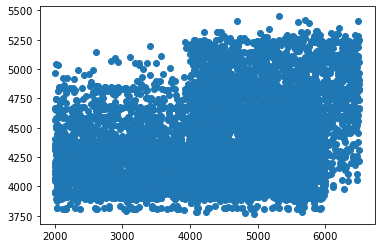

In [318]:
plt.scatter(y,predictions)

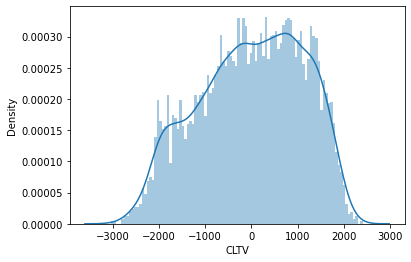

In [319]:
sns.distplot((y-predictions),bins=100);

In [320]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

MAE: 945.680459524148
MSE: 1264375.7526818141
RMSE: 1124.444641892972


In [321]:
X = sm.add_constant(X)

result = sm.OLS( y, X).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CLTV   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     35.71
Date:                Sun, 13 Feb 2022   Prob (F-statistic):          1.89e-137
Time:                        20:04:18   Log-Likelihood:                -59471.
No. Observations:                7043   AIC:                         1.190e+05
Df Residuals:                    7021   BIC:                         1.191e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2590.3567     50.630     51.162      0.0

## Runing Random Forest Regressor

In [322]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_forest =rf.fit(X_train,y_train)

In [323]:
random_forest.score(X_train,y_train)

0.7516186916648071

In [324]:
y_predict = random_forest.predict(X_test)
y_predict

array([5151.7  , 4059.225, 4403.9  , ..., 4554.6  , 4210.7  , 4189.9  ])

In [325]:
random_forest.feature_importances_

array([0.35395217, 0.06365889, 0.0353177 , 0.05527819, 0.02918858,
       0.00987625, 0.00956143, 0.04563326, 0.02738132, 0.02647994,
       0.03141698, 0.0180578 , 0.01844728, 0.03449544, 0.02152868,
       0.0168715 , 0.05806246, 0.02321109, 0.03037116, 0.0060956 ,
       0.01858158, 0.01859994, 0.02049451, 0.02743824])

Feature: 0, Score: 0.35395
Feature: 1, Score: 0.06366
Feature: 2, Score: 0.03532
Feature: 3, Score: 0.05528
Feature: 4, Score: 0.02919
Feature: 5, Score: 0.00988
Feature: 6, Score: 0.00956
Feature: 7, Score: 0.04563
Feature: 8, Score: 0.02738
Feature: 9, Score: 0.02648
Feature: 10, Score: 0.03142
Feature: 11, Score: 0.01806
Feature: 12, Score: 0.01845
Feature: 13, Score: 0.03450
Feature: 14, Score: 0.02153
Feature: 15, Score: 0.01687
Feature: 16, Score: 0.05806
Feature: 17, Score: 0.02321
Feature: 18, Score: 0.03037
Feature: 19, Score: 0.00610
Feature: 20, Score: 0.01858
Feature: 21, Score: 0.01860
Feature: 22, Score: 0.02049
Feature: 23, Score: 0.02744


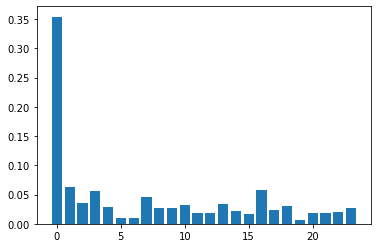

In [326]:
importance = random_forest.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [340]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],color='#9976ff')
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

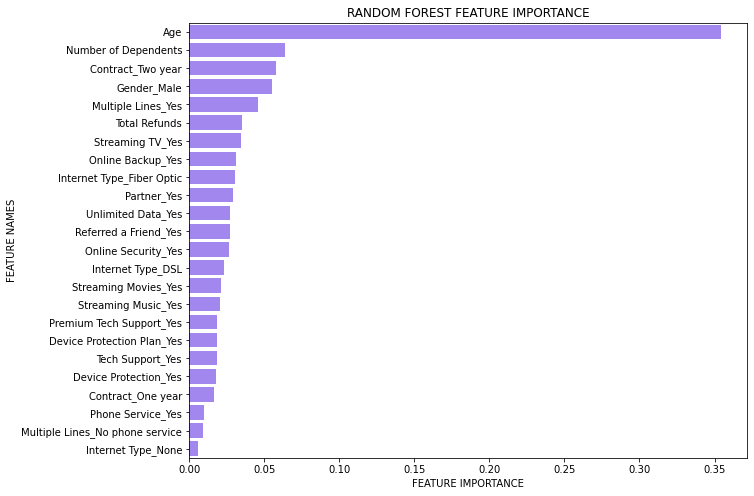

In [341]:
plot_feature_importance(random_forest.feature_importances_,train.columns,'RANDOM FOREST')

In [342]:
random_forest.set_params()

RandomForestRegressor(n_estimators=10, random_state=0)

In [343]:
prueba.columns

Index(['Age', 'Number of Dependents', 'Total Refunds', 'CLTV', 'Gender_Male',
       'Partner_Yes', 'Phone Service_Yes', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Referred a Friend_Yes', 'Online Security_Yes',
       'Online Backup_Yes', 'Device Protection_Yes', 'Tech Support_Yes',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Contract_One year',
       'Contract_Two year', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Device Protection Plan_Yes',
       'Premium Tech Support_Yes', 'Streaming Music_Yes',
       'Unlimited Data_Yes'],
      dtype='object')

## Runing Ridge Regression

In [344]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from numpy import absolute
from numpy import mean
from numpy import std

# define model
rg = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rg, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 948.706 (16.986)


In [345]:
rg.fit(X_train, y_train)

Ridge()

In [346]:
rg.score(X_train, y_train)

0.09522703847845082

## Runing Lasso Regression

In [347]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from numpy import absolute
from numpy import mean
from numpy import std

# define model
lasso = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(lasso, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 948.702 (17.125)


In [348]:
lasso.fit(X_train, y_train)

Lasso()

In [349]:
lasso.score(X_train, y_train)

0.09501450908941844